In [1]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter
import pepbench.plotting
from pepbench.io import load_best_performing_algos, load_preprocessed_training_data, compute_abs_error, get_best_pipeline_results, get_best_estimator, get_pipeline_steps

import pingouin as pg

import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
model_path = Path("../../results/models")
data_path = Path("../../results/data")
result_path = Path("../../results")

In [3]:
input_data = pd.read_csv(data_path.joinpath("train_data_no_outlier_correction.csv"), index_col=[0,1,2,3,4])
input_data

arbol2017-isoelectric-crossings  \
      participant phase         heartbeat_id_reference b_point_sample_reference                                    
0     GDN0005     HoldingBreath 0                      388.0                                               438.0   
1     GDN0005     HoldingBreath 1                      404.0                                               340.0   
2     GDN0005     HoldingBreath 3                      376.0                                               382.0   
3     GDN0005     HoldingBreath 4                      390.0                                               394.0   
4     GDN0005     HoldingBreath 5                      386.0                                               398.0   
...                                                                                                          ...   
11219 VP_032      Talk          39                     310.0                                               335.0   
11220 VP_032      Talk          40                     322.0                                               331.0   
11221 VP_032      Talk          41                     340.0                                               317.0   
11222 VP_032      Talk          42                     311.0                                               365.0   
11223 VP_032      Talk          43                     307.0                                               342.0   

                                                                                 arbol2017-second-derivative  \
      participant phase         heartbeat_id_reference b_point_sample_reference                                
0     GDN0005     HoldingBreath 0                      388.0                                           398.0   
1     GDN0005     HoldingBreath 1                      404.0                                           350.0   
2     GDN0005     HoldingBreath 3                      376.0                                           296.0   
3     GDN0005     HoldingBreath 4                      390.0                                           344.0   
4     GDN0005     HoldingBreath 5                      386.0                                           312.0   
...                                                                                                      ...   
11219 VP_032      Talk          39                     310.0                                           276.0   
11220 VP_032      Talk          40                     322.0                                           298.0   
11221 VP_032      Talk          41                     340.0                                           300.0   
11222 VP_032      Talk          42                     311.0                                           324.0   
11223 VP_032      Talk          43                     307.0                                           313.0   

                                                                                 arbol2017-third-derivative  \
      participant phase         heartbeat_id_reference b_point_sample_reference                               
0     GDN0005     HoldingBreath 0                      388.0                                          394.0   
1     GDN0005     HoldingBreath 1                      404.0                                          244.0   
2     GDN0005     HoldingBreath 3                      376.0                                          386.0   
3     GDN0005     HoldingBreath 4                      390.0                                          396.0   
4     GDN0005     HoldingBreath 5                      386.0                                          388.0   
...                                                                                                     ...   
11219 VP_032      Talk          39                     310.0                                          324.0   
11220 VP_032      Talk          40                     322.0                                          330.0   
11221

In [4]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("KNeighbors_No_Outlier_Correction.pkl"))
permuter1.metric_summary()

true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                RFE                 KNeighborsRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                RFE                 KNeighborsRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                                         true_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   
                RFE                 KNeighborsRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   
                RFE                 KNeighborsRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                                          predicted_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [357.26026274767827, 342.3397730034228, 366.11...   
                RFE                 KNeighborsRegressor  [363.085485931488, 342.61961720647287, 371.428...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [359.6414425809928, 341.8356502802455, 366.889...   
                RFE                 KNeighborsRegressor  [371.14289041775334, 346.63798434339765, 377.0...   

                                                                                    predicted_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [[357.26026274767827, 342.3397730034228, 366.1...   
                RFE                 KNeighborsRegressor  [[363.085485931488, 342.61961720647287, 371.42...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [[359.6414425809928, 341.8356502802455, 366.88...   
                RFE                 KNeighborsRegressor  [[371.14289041775334, 346.63798434339765, 377....   

                                                                                             train_indices  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                RFE                 KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                RFE                 KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                                       train_indices_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                RFE                 KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                RFE                 KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                                              test_indices  \
pipeline_scaler pip

In [5]:
permuter1.best_estimator_summary()

best_estimator
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                          
StandardScaler  SelectKBest         KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...
                RFE                 KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...
MinMaxScaler    SelectKBest         KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...
                RFE                 KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...

In [6]:
permuter1.best_hyperparameter_pipeline()

C:\Users\sebas\Development\ResearchInternship\Code\BioPsyKit\src\biopsykit\classification\model_selection\sklearn_pipeline_permuter.py:680: FutureWarning: ['param_clf__weights', 'param_reduce_dim__k', 'params'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(["mean", "std"])


mean_test_neg_mean_absolute_error  param_clf__n_neighbors  \
outer_fold                                                              
0                                   -8.635566                      14   
1                                   -8.955911                      14   
2                                   -8.639042                      14   
3                                   -9.138771                      14   
4                                   -8.743441                      14   

            param_clf__p param_clf__weights  \
outer_fold                                    
0                      1           distance   
1                      1           distance   
2                      1           distance   
3                      1           distance   
4                      1           distance   

            param_reduce_dim__n_features_to_select  param_reduce_dim__step  \
outer_fold                                                                   
0                                              0.4                     1.0   
1                                              0.4                     1.0   
2                                              0.4                     1.0   
3                                              0.4                     1.0   
4                                              0.4                     1.0   

                                                       params  \
outer_fold                                                      
0           {'clf__n_neighbors': 14, 'clf__p': 1, 'clf__we...   
1           {'clf__n_neighbors': 14, 'clf__p': 1, 'clf__we...   
2           {'clf__n_neighbors': 14, 'clf__p': 1, 'clf__we...   
3           {'clf__n_neighbors': 14, 'clf__p': 1, 'clf__we...   
4           {'clf__n_neighbors': 14, 'clf__p': 1, 'clf__we...   

            rank_test_neg_mean_absolute_error  \
outer_fold                                      
0                                           6   
1                                           1   
2                                           1   
3                                           4   
4                                           8   

            split0_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -7.355686   
1                                     -8.266636   
2                                     -8.238201   
3                                     -9.782426   
4                                     -7.631981   

            split1_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -9.623169   
1                                    -10.614622   
2                                     -9.115226   
3                                     -9.631542   
4                                     -8.958766   

            split2_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -8.323662   
1                                     -8.423419   
2                                     -9.022021   
3                                     -8.410206   
4                                    -10.848190   

            split3_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -8.708293   
1                                     -8.599175   
2                                     -8.862420   
3                                     -8.830565   
4                                     -8.984664   

            split4_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -9.167020   
1                                     -8.875704   
2                                     -7.957339   
3                                     -9.039118   
4                                     -7.293606   

            std_test_neg_mean_abs

In [7]:
best_algo = get_best_pipeline_results(permuter1, metric="mean_absolute_error")
best_algo

true_labels  \
StandardScaler RFE KNeighborsRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                        true_labels_folds  \
StandardScaler RFE KNeighborsRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                         predicted_labels  \
StandardScaler RFE KNeighborsRegressor  [363.085485931488, 342.61961720647287, 371.428...   

                                                                   predicted_labels_folds  \
StandardScaler RFE KNeighborsRegressor  [[363.085485931488, 342.61961720647287, 371.42...   

                                                                            train_indices  \
StandardScaler RFE KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                      train_indices_folds  \
StandardScaler RFE KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                             test_indices  \
StandardScaler RFE KNeighborsRegressor  [2257, 2258, 2259, 2260, 2261, 2262, 2263, 226...   

                                                                       test_indices_folds  \
StandardScaler RFE KNeighborsRegressor  [[2257, 2258, 2259, 2260, 2261, 2262, 2263, 22...   

                                       mean_test_neg_mean_absolute_error  \
StandardScaler RFE KNeighborsRegressor                          8.689497   

                                       std_test_neg_mean_absolute_error  \
StandardScaler RFE KNeighborsRegressor                         0.825251   

                                       test_neg_mean_absolute_error_fold_0  \
StandardScaler RFE KNeighborsRegressor                            9.611074   

                                       test_neg_mean_absolute_error_fold_1  \
StandardScaler RFE KNeighborsRegressor                            8.498979   

                                       test_neg_mean_absolute_error_fold_2  \
StandardScaler RFE KNeighborsRegressor                            9.256969   

                                       test_neg_mean_absolute_error_fold_3  \
StandardScaler RFE KNeighborsRegressor                            7.217285   

                                       test_neg_mean_absolute_error_fold_4  
StandardScaler RFE KNeighborsRegressor                            8.863179

In [8]:
best_estimator, _ = get_best_estimator(permuter1, metric="mean_absolute_error")

In [9]:
best_estimator

[Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 RFE(estimator=SVC(kernel='linear'), n_features_to_select=0.4,
                     step=2)),
                ('clf',
                 KNeighborsRegressor(n_neighbors=13, p=1, weights='distance'))]), Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 RFE(estimator=SVC(kernel='linear'), n_features_to_select=0.4)),
                ('clf',
                 KNeighborsRegressor(n_neighbors=14, p=1, weights='distance'))]), Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 RFE(estimator=SVC(kernel='linear'), n_features_to_select=0.4)),
                ('clf',
                 KNeighborsRegressor(n_neighbors=14, p=1, weights='distance'))]), Pipeline(memory=Memory(locat

In [11]:
get_pipeline_steps(permuter1, input_data=input_data, metric="mean_absolute_error", step="reduce_dim", scaler=True)

[['debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-quadratic-regression'],
 ['debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-linear-regression'],
 ['debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-linear-regression'],
 ['debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-linear-regression'],
 ['debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-quadratic-regression']]

In [28]:
reference_labels = best_algo["true_labels"].values[0]
reference_labels

array([370., 346., 374., ..., 180., 207., 211.])

In [29]:
best_algo["predicted_labels"].values[0]

array([366.68346663, 340.12827646, 376.02875397, ..., 189.14330411,
       193.34873665, 199.8738961 ])

In [30]:
abs_error_estimator = np.abs(best_algo["predicted_labels"].values[0] - reference_labels)
abs_error_estimator

array([ 3.31653337,  5.87172354,  2.02875397, ...,  9.14330411,
       13.65126335, 11.1261039 ])

In [31]:
np.mean(abs_error_estimator)

7.675380708124358

### Load the computed labels of algorithms that showed good performance

In [32]:
best_algos_empkins = load_best_performing_algos(result_path.joinpath("empkins_dataset_reference_q_wave").resolve(), n_best=8)
best_algos_empkins

mean  \
b_point_algorithm               outlier_correction_algorithm              
drost2022                       none                          15.145887   
                                forouzanfar2018               15.532887   
                                linear-interpolation          15.647721   
debski1993-second-derivative    forouzanfar2018               16.125764   
                                linear-interpolation          16.319323   
                                none                          16.604698   
lozano2007-quadratic-regression none                          21.237032   
lozano2007-linear-regression    none                          21.891105   

                                                                    std  
b_point_algorithm               outlier_correction_algorithm             
drost2022                       none                           6.024353  
                                forouzanfar2018                6.115452  
                                linear-interpolation           6.145578  
debski1993-second-derivative    forouzanfar2018                7.875159  
                                linear-interpolation           8.103976  
                                none                           6.916449  
lozano2007-quadratic-regression none                           9.367100  
lozano2007-linear-regression    none                          10.024544

In [33]:
best_algos_guardian = load_best_performing_algos(result_path.joinpath("guardian_dataset_reference_q_wave").resolve(), n_best=9)
best_algos_guardian

mean  \
b_point_algorithm            outlier_correction_algorithm              
lozano2007-linear-regression none                          16.955571   
                             forouzanfar2018               17.493539   
                             linear-interpolation          17.557286   
stern1985                    linear-interpolation          18.253075   
drost2022                    none                          18.538199   
stern1985                    forouzanfar2018               18.877321   
forounzafar2018              linear-interpolation          18.971214   
                             forouzanfar2018               19.035267   
drost2022                    forouzanfar2018               19.653829   

                                                                 std  
b_point_algorithm            outlier_correction_algorithm             
lozano2007-linear-regression none                           6.242513  
                             forouzanfar2018                6.948912  
                             linear-interpolation           6.965491  
stern1985                    linear-interpolation          14.071712  
drost2022                    none                           5.712188  
stern1985                    forouzanfar2018               14.490521  
forounzafar2018              linear-interpolation          11.845366  
                             forouzanfar2018               12.028883  
drost2022                    forouzanfar2018                6.157572

In [34]:
data_best_algos_empkins = load_preprocessed_training_data(data_path.joinpath("train_data.csv"), algorithms=best_algos_empkins.index, include_reference=True)
data_best_algos_guardian = load_preprocessed_training_data(data_path.joinpath("train_data.csv"), algorithms=best_algos_guardian.index, include_reference=True)

In [35]:
abs_error_empkins = compute_abs_error(data_best_algos_empkins, data_best_algos_empkins["b_point_sample_reference"])
abs_error_empkins

drost2022_none  \
participant phase         heartbeat_id_reference                   
GDN0005     HoldingBreath 0                                 12.0   
                          1                                 16.0   
                          3                                 10.0   
                          4                                  6.0   
                          5                                  6.0   
...                                                          ...   
VP_032      Talk          39                                 8.0   
                          40                                 0.0   
                          41                                 3.0   
                          42                                43.0   
                          43                                25.0   

                                                  drost2022_forouzanfar2018  \
participant phase         heartbeat_id_reference                              
GDN0005     HoldingBreath 0                                            12.0   
                          1                                            16.0   
                          3                                            10.0   
                          4                                             6.0   
                          5                                             6.0   
...                                                                     ...   
VP_032      Talk          39                                            8.0   
                          40                                            0.0   
                          41                                            3.0   
                          42                                           43.0   
                          43                                           25.0   

                                                  drost2022_linear-interpolation  \
participant phase         heartbeat_id_reference                                   
GDN0005     HoldingBreath 0                                                 12.0   
                          1                                                 16.0   
                          3                                                 10.0   
                          4                                                  6.0   
                          5                                                 16.0   
...                                                                          ...   
VP_032      Talk          39                                                 8.0   
                          40                                                 0.0   
                          41                                                 3.0   
                          42                                                43.0   
                          43                                                25.0   

                                                  debski1993-second-derivative_forouzanfar2018  \
participant phase         heartbeat_id_reference                                                 
GDN0005     HoldingBreath 0                                                               64.0   
                          1                                                               22.0   
                          3                                                               10.0   
                          4                                                               14.0   
                          5                                                               32.0   
...                                                                                        ...   
VP_032      Talk          39                                                               1.0   
                          40                                                               4.0   
                          41                                    

In [36]:
abs_error_guardian = compute_abs_error(data_best_algos_guardian, data_best_algos_guardian["b_point_sample_reference"])
abs_error_guardian

lozano2007-linear-regression_none  \
participant phase         heartbeat_id_reference                                      
GDN0005     HoldingBreath 0                                                    24.0   
                          1                                                     0.0   
                          3                                                    10.0   
                          4                                                    18.0   
                          5                                                     8.0   
...                                                                             ...   
VP_032      Talk          39                                                    5.0   
                          40                                                    1.0   
                          41                                                    8.0   
                          42                                                   40.0   
                          43                                                   34.0   

                                                  lozano2007-linear-regression_forouzanfar2018  \
participant phase         heartbeat_id_reference                                                 
GDN0005     HoldingBreath 0                                                               24.0   
                          1                                                                0.0   
                          3                                                               10.0   
                          4                                                               16.0   
                          5                                                                6.0   
...                                                                                        ...   
VP_032      Talk          39                                                               5.0   
                          40                                                               6.0   
                          41                                                               8.0   
                          42                                                              40.0   
                          43                                                              34.0   

                                                  lozano2007-linear-regression_linear-interpolation  \
participant phase         heartbeat_id_reference                                                      
GDN0005     HoldingBreath 0                                                                    24.0   
                          1                                                                     0.0   
                          3                                                                    10.0   
                          4                                                                    16.0   
                          5                                                                     6.0   
...                                                                                             ...   
VP_032      Talk          39                                                                    5.0   
                          40                                                                    6.0   
                          41                                                                    8.0   
                          42                                                                   40.0   
                          43                                                                   34.0   

                                                  stern1985_linear-interpolation  \
participant phase         heartbeat_id_reference                                   
GDN0005     HoldingBreath 0                                                  0.0   
                          1                        

### Boxplot of the absolute errors of the machine learning prediction and the best performing algorithms against the reference data

In [37]:
data = [abs_error_estimator, abs_error_empkins["drost2022_none"], abs_error_empkins["drost2022_forouzanfar2018"], abs_error_guardian["lozano2007-linear-regression_none"], abs_error_guardian["lozano2007-linear-regression_forouzanfar2018"]]
labels = ["Best Estimator", "Drost2022", "Drost2022 - Forouzanfar 2018", "Lozano2007 Linear Regression", "Lozano2007 Linear Regression - Forouzanfar 2018"]

In [38]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Comparision of the Absolute Errors")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error")
plt.show()

### Residualplot of the machine learning prediction against the reference data

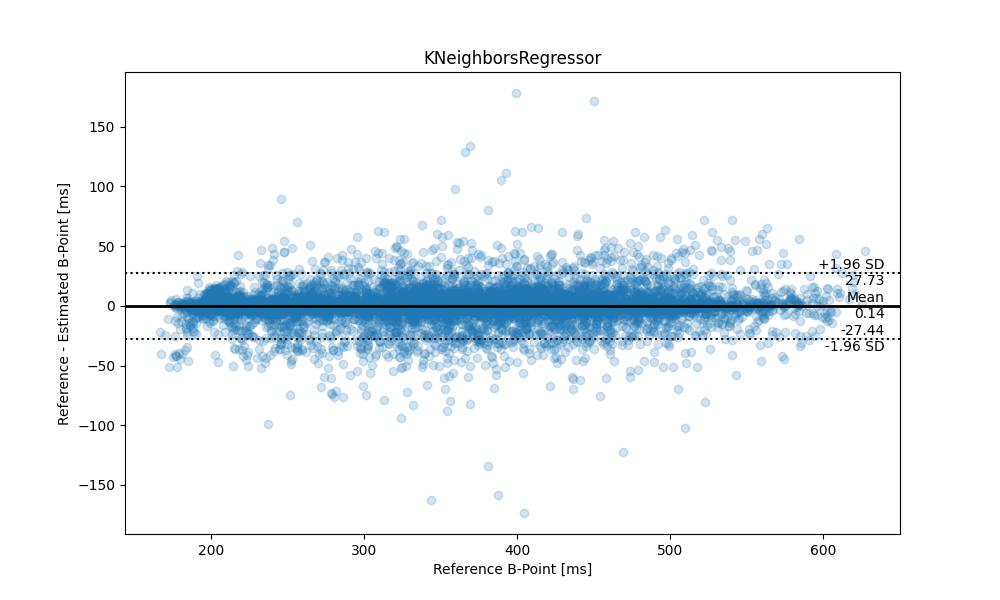

In [39]:
plt.figure(figsize=(10, 6))
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], alpha=0.2)
plt.title("KNeighborsRegressor")
plt.xlabel("Reference B-Point [ms]")
plt.ylabel("Reference - Estimated B-Point [ms]")
plt.show()